In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Data is presented in the following categories: 

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]                                              

First, we will load the data and take a look at its shape and info. 

In [3]:
heart_data = pd.read_csv('heart.csv')

In [4]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Now we will see if there are any null values that need to be taken out of the data.

In [6]:


missing = pd.concat([heart_data.isnull().sum(), 100 * heart_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


Next, we will look for any numeric aberrations (measurements that don't make sense) or outliers by describing the data and plotting it in histograms. 

In [7]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


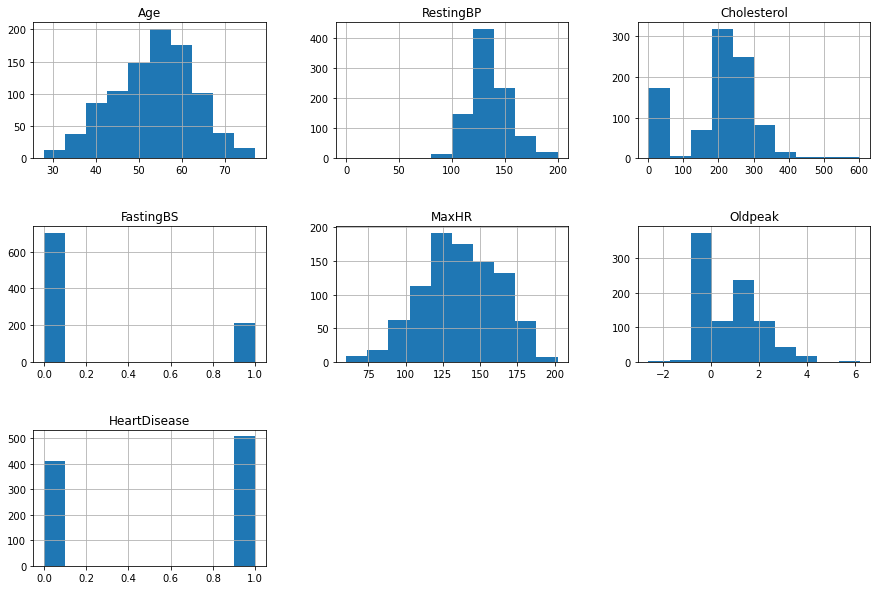

In [8]:
heart_data.hist(figsize= (15,10))
plt.subplots_adjust(hspace=0.5)

Text(0, 0.5, 'Count')

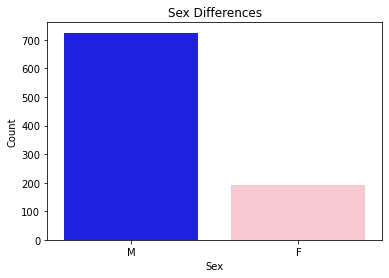

In [9]:
## Let's do some EDA 
sns.countplot(data=heart_data,x='Sex' , palette=['blue','pink']);
plt.title('Sex Differences')
plt.xlabel('Sex')
plt.ylabel('Count')

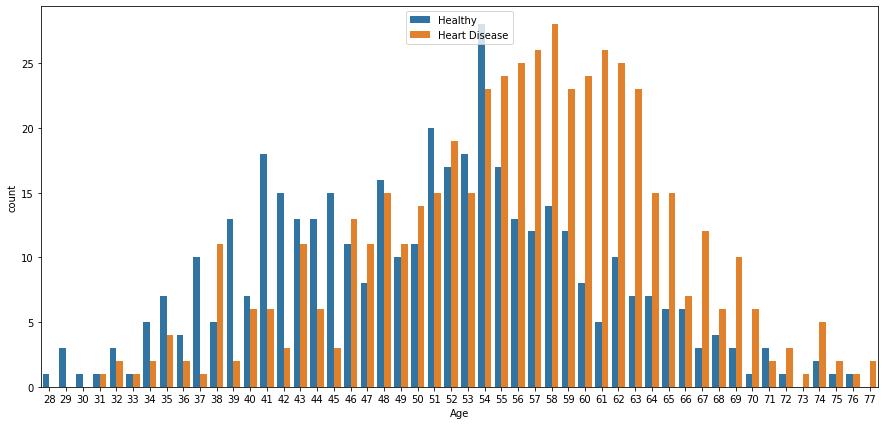

In [10]:
# Here we can see the age distribution in the data

plt.figure(figsize=(15,7))
sns.countplot(x='Age', data=heart_data, hue='HeartDisease')
plt.legend(['Healthy', 'Heart Disease'])
plt.show()

<AxesSubplot:>

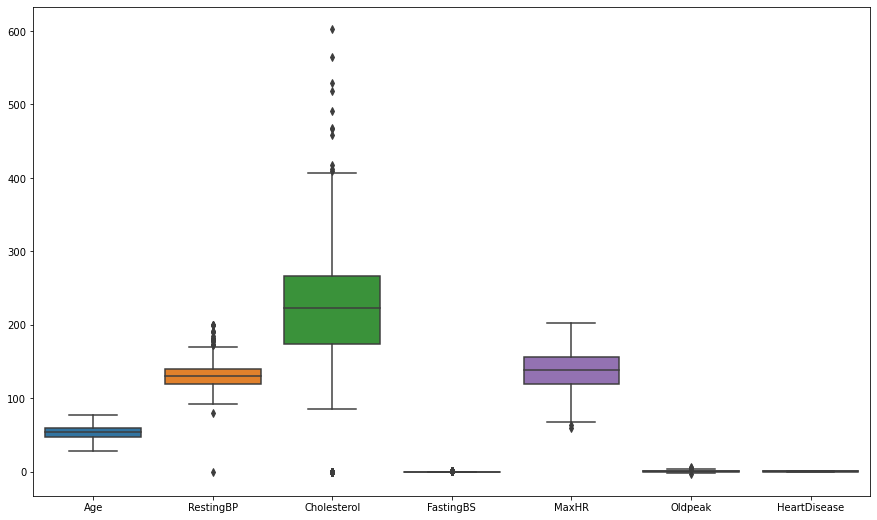

In [11]:
plt.figure(figsize=(15,9))
sns.boxplot(data=heart_data)

We saw earlier that there ae outliers in the BP and in the cholesterol, and we can handle each below. The BP we will simply drop, while the cholesterol will be replaced with the median so it doesn't disrupt hte data's central tendency.

In [12]:
df = heart_data.drop(heart_data[(heart_data['RestingBP'] == 0)].index) 

In [13]:
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())
df["Cholesterol"]

0      289.0
1      180.0
2      283.0
3      214.0
4      195.0
       ...  
913    264.0
914    193.0
915    131.0
916    236.0
917    175.0
Name: Cholesterol, Length: 917, dtype: float64

<AxesSubplot:>

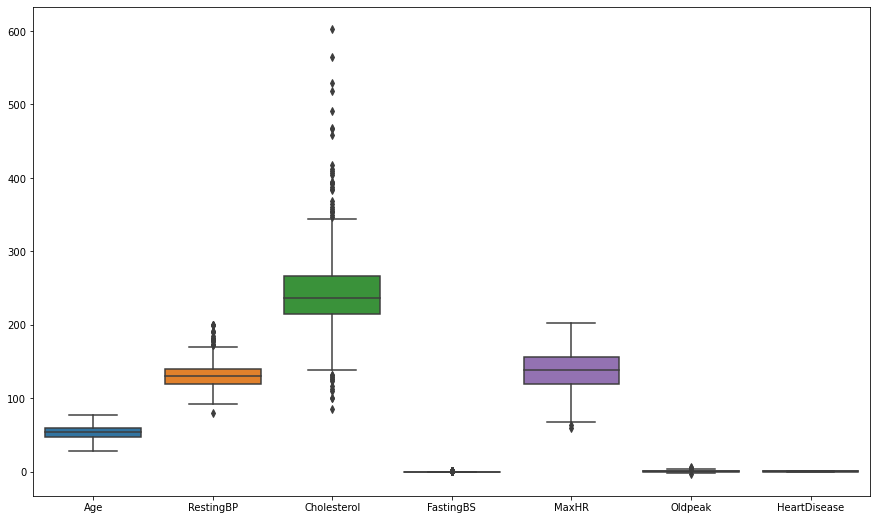

In [14]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df)

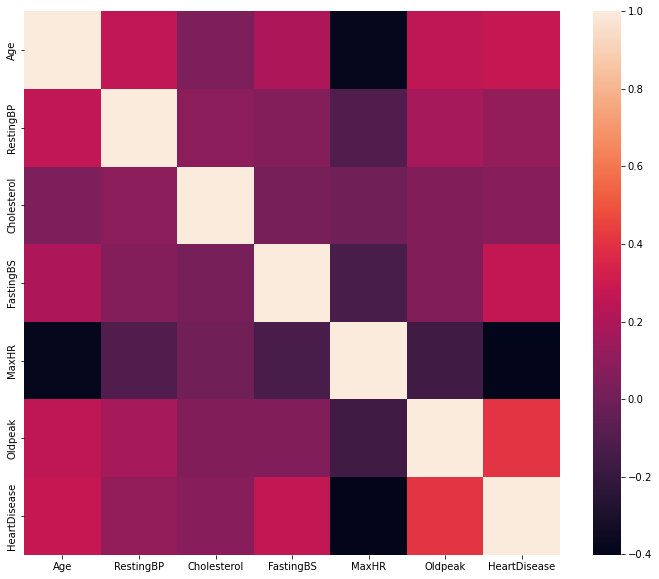

In [15]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

Here we look at the correlations of the data on a heatmap. We are interested in points which have high levels of correlation with heart disease 

# Pre-processing:
Now we will categorize and fit the data, split the data into training sets, create dummy sets, and the rest of pre-modeling work.

In [25]:
ChestPainType_le = LabelEncoder()
RestingECG_le = LabelEncoder()
ExerciseAngina_le = LabelEncoder()
ST_Slope_le = LabelEncoder()
Sex_le = LabelEncoder()
df['ChestPainType'] = ChestPainType_le.fit_transform(df['ChestPainType'])
df['RestingECG'] = RestingECG_le.fit_transform(df['RestingECG'])
df['ST_Slope'] = ST_Slope_le.fit_transform(df['ExerciseAngina'])
df['ExerciseAngina'] = ExerciseAngina_le.fit_transform(df['ExerciseAngina'])
df['Sex'] = Sex_le.fit_transform(df['Sex'])

In [26]:
x = df.drop('HeartDisease', axis=1)
y = df.HeartDisease

We isolate Heart Disease from the rest of the data


In [27]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

Now the data is split into test and training sets.

In [28]:
std_scaler = StandardScaler()
std_scaler.fit(x)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=x.columns)
X_test = pd.DataFrame(X_test_std, columns=x.columns)